## Load Data

In [ ]:
# fashion_mnist
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Reshape Data

In [ ]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## SGD

In [ ]:
#Better optimizer

initializer = tf.keras.initializers.RandomNormal()

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(10))


# optimizer and loss
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# training
batch_size = 512
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=300, verbose=2)
# 118/118 - 0s - loss: 2.3005 - accuracy: 0.1195 - val_loss: 2.3006 - val_accuracy: 0.1211 - 450ms/epoch - 4ms/step

Epoch 1/300
118/118 - 6s - loss: 2.3268 - accuracy: 0.0997 - val_loss: 2.3029 - val_accuracy: 0.1000 - 6s/epoch - 48ms/step
Epoch 2/300
118/118 - 0s - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.1000 - 466ms/epoch - 4ms/step
Epoch 3/300
118/118 - 0s - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3029 - val_accuracy: 0.1000 - 456ms/epoch - 4ms/step
Epoch 4/300
118/118 - 0s - loss: 2.3028 - accuracy: 0.1007 - val_loss: 2.3028 - val_accuracy: 0.1000 - 455ms/epoch - 4ms/step
Epoch 5/300
118/118 - 0s - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy: 0.1000 - 460ms/epoch - 4ms/step
Epoch 6/300
118/118 - 0s - loss: 2.3028 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.1000 - 434ms/epoch - 4ms/step
Epoch 7/300
118/118 - 0s - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000 - 477ms/epoch - 4ms/step
Epoch 8/300
118/118 - 0s - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000 - 490ms/epoch - 4ms

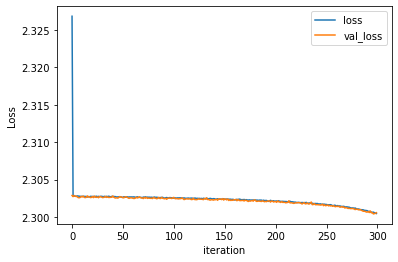

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

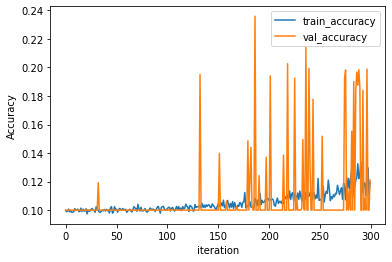

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()